
# Neuronal Convolucional en cascada (Cascade CNN) para detectar si hay o no una cara

In [4]:
#!pip install patlib
#!pip install opencv-python2
import numpy as np
import pandas as pd
import patlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import keras
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Activation,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.legacy import Adam
import cv2
from tensorflow.keras.callbacks import EarlyStopping






In [5]:
def etiquetar_imagenes(folder1, folder2, img_size=100, test_size=0.2):
    data = []
    labels = []

    for category in os.listdir(folder1):
        path = os.path.join(folder1, category)
        if os.path.isdir(path):
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (img_size, img_size))
                    img = img.astype('float32') / 255.0  # Normalize the image
                    data.append(img)
                    labels.append(0)
                else:
                    print(f"Failed to load image: {img_path}")

    for category in os.listdir(folder2):
        path = os.path.join(folder2, category)
        if os.path.isdir(path):
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (img_size, img_size))
                    img = img.astype('float32') / 255.0  # Normalize the image
                    data.append(img)
                    labels.append(1)
                else:
                    print(f"Failed to load image: {img_path}")

    data = np.array(data).reshape(-1, img_size, img_size, 1)
    labels = np.array(labels)

    print(f"Loaded {len(data)} images.")
    
    # Split the data and labels into training and validation sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=test_size, random_state=42)

    return X_test, y_test, X_train, y_train, X_val, y_val


In [6]:
X_test, y_test, X_train, y_train, X_val, y_val=etiquetar_imagenes(r".\Datanoface", r".\Dataface")

Loaded 60344 images.


In [7]:

# Definir la arquitectura de la Red Neuronal Convolucional en cascada
model = tf.keras.Sequential([
    # Primera etapa de detección
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Segunda etapa de detección
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Tercera etapa de detección
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Cuarta etapa de detección
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Quinta etapa de detección
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Capa de salida
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo con el algoritmo de optimización 'Adam' y la función de pérdida 'binary_crossentropy'

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
# Entrenar el modelo con los datos de entrenamiento
H=model.fit(X_train,y_train, epochs=15, validation_data=(X_val,y_val),batch_size=100) 

# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)



Epoch 1/15
387/387 [==============================] - 197s 507ms/step - loss: 0.1650 - accuracy: 0.9314 - val_loss: 0.0629 - val_accuracy: 0.9761
Epoch 2/15
387/387 [==============================] - 197s 508ms/step - loss: 0.0243 - accuracy: 0.9919 - val_loss: 0.0290 - val_accuracy: 0.9898
Epoch 3/15
387/387 [==============================] - 196s 507ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0084 - val_accuracy: 0.9974
Epoch 4/15
387/387 [==============================] - 196s 505ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0113 - val_accuracy: 0.9970
Epoch 5/15
387/387 [==============================] - 195s 504ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0057 - val_accuracy: 0.9981
Epoch 6/15
387/387 [==============================] - 196s 507ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0084 - val_accuracy: 0.9978
Epoch 7/15
387/387 [==============================] - 195s 505ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0218 -

In [8]:
print('test loss',test_loss,'test accuracy',test_acc)

test loss 0.02797868475317955 test accuracy 0.9947800040245056


[INFO]: Evaluando red neuronal...


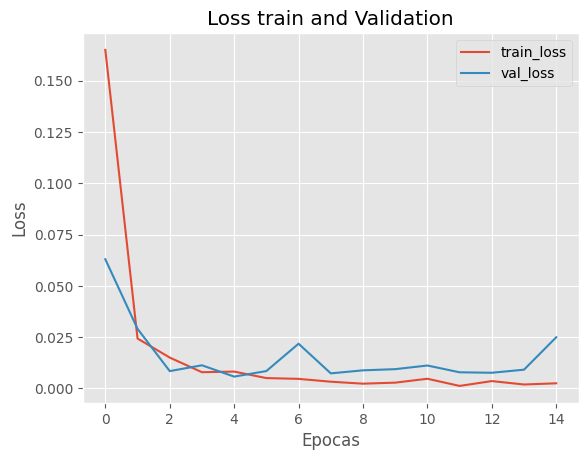

In [9]:

# Evaluando el modelo:

print("[INFO]: Evaluando red neuronal...")
#predictions = modeL.predict(X_test, batch_size=batch_size)  #(X)


# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")


plt.title("Loss train and Validation")
plt.xlabel("Epocas")
plt.ylabel("Loss")
plt.legend()



In [12]:
model.save('modelo.h5')


### Funcion de Prediccion

In [1]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.load_model('modelo.h5')

In [2]:
import cv2
import numpy as np

def detectar_cara(img_path, model):
    # Cargar la imagen y preprocesarla
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)

    # Hacer la predicción
    prediction = model.predict(img)

    # Mostrar la predicción
    if prediction[0][0] > 0.5:
        print("La imagen es una cara.")
    else:
        print("La imagen no es una cara.")

In [3]:
detectar_cara('FACE.jpg', model)

1/1 [==============================] - 0s 248ms/step
La imagen es una cara.


In [4]:
detectar_cara('NOFACE.jpg', model)

1/1 [==============================] - 0s 28ms/step
La imagen no es una cara.
